### ANÁLISIS DE LOS FACTORES QUE INCREMENTAN EL AUMENTO EN EL CONSUMO DE COMBUSTIBLE Y LA HUELLA DE CARBONO Y COMPARATIVA ENTRE LOS 5 PAISES INDUSTRIALIZADOS CON MAS CONTAMINANTES (CHINA, INDIA, ESTADOS UNIDOS, JAPON Y RUSIA) Y LOS 5 PAISES NO INDUSTRIALIZADOS CON MAS CONTAMINANTES (BRASIL, INDONESIA, NIGERIA, REPÚBLICA DEMOCRÁTICA DEL CONGO Y ETIOPÍA) ENTRE 1950 Y 2023.

---

#### Introducción

El aumento en el consumo de combustibles fósiles y las emisiones de CO₂ son factores clave en el cambio climático. Entre 1950 y 2023, los países industrializados (China, India, Estados Unidos, Japón y Rusia) han liderado las emisiones globales debido a su alto desarrollo industrial. Por otro lado, países no industrializados (Brasil, Indonesia, Nigeria, República Democrática del Congo y Etiopía) enfrentan sus propios retos, como el crecimiento poblacional.

Este análisis, realizado en un Google Colab, compara las emisiones y los patrones de contaminación entre ambos grupos, visualizando los datos históricos mediante gráficas generadas en Python para entender mejor las dinámicas y su impacto ambiental.

In [ ]:
import pandas as pd
import datetime as dt

'''
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
'''

#IMPORTANDO EL DATAFRAME

df = pd.read_csv("owid-co2-data.csv")

df = df[df['iso_code'].str.contains('CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH', case=False, na=False)]

fecha_inicio = 1950
fecha_fin = 2023

df = df[(df['year'] >= fecha_inicio) & (df['year'] <= fecha_fin)]

#ELIMINANDO COLUMNAS

columnas = [
    'gdp',
    'co2_growth_abs',
    'co2_including_luc', 'co2_including_luc_growth_abs',
    'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
    'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
    'co2_per_gdp', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
    'cumulative_co2_including_luc', 'cumulative_coal_co2',
    'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
    'cumulative_oil_co2', 'cumulative_other_co2',
    'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
    'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
    'land_use_change_co2', 'land_use_change_co2_per_capita',
    'share_global_cement_co2', 'share_global_co2',
    'share_global_co2_including_luc', 'share_global_coal_co2',
    'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
    'share_global_cumulative_co2_including_luc',
    'share_global_cumulative_coal_co2', 'share_global_cumulative_flaring_co2',
    'share_global_cumulative_gas_co2', 'share_global_cumulative_luc_co2',
    'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2',
    'share_global_flaring_co2', 'share_global_gas_co2',
    'share_global_luc_co2', 'share_global_oil_co2',
    'share_global_other_co2', 'share_of_temperature_change_from_ghg',
    'temperature_change_from_ch4', 'temperature_change_from_co2',
    'temperature_change_from_ghg', 'temperature_change_from_n2o',
    'total_ghg', 'total_ghg_excluding_lucf', 'trade_co2', 'trade_co2_share'
]


df = df.drop(columns = columnas)

#LIMPIANDO DATOS

df = df.fillna(0)

print(df.columns)

Index(['country', 'year', 'iso_code', 'population', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_prct', 'co2_per_capita',
       'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita',
       'consumption_co2', 'consumption_co2_per_capita', 'energy_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption'],
      dtype='object')


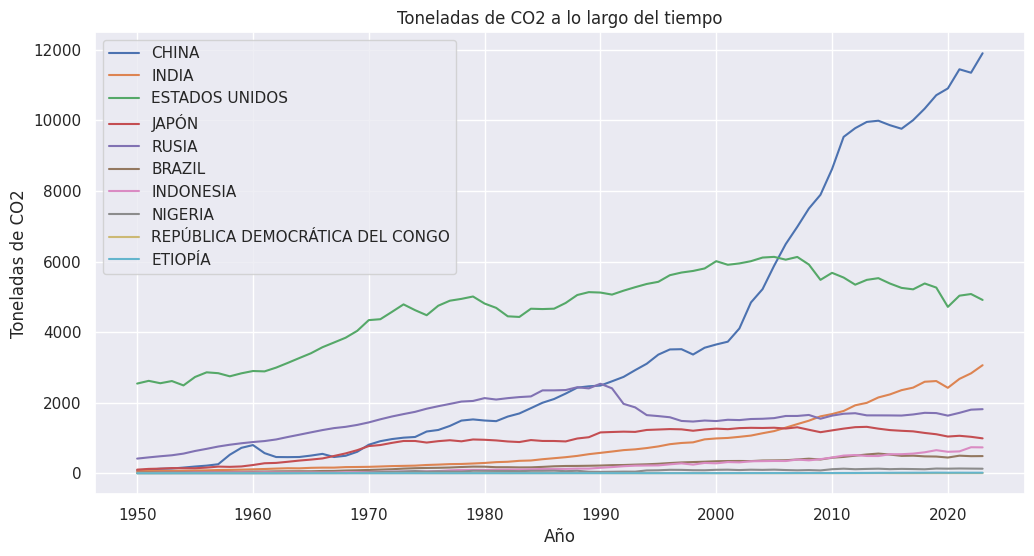

In [ ]:
import matplotlib.pyplot as plt

#CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH

#CREANDO DATAFRAMES PER COUNTRY

df_CHN = df[df['iso_code'].str.contains('CHN', case=False, na=False)]
df_IND = df[df['iso_code'].str.contains('IND', case=False, na=False)]
df_USA = df[df['iso_code'].str.contains('USA', case=False, na=False)]
df_JPN = df[df['iso_code'].str.contains('JPN', case=False, na=False)]
df_RUS = df[df['iso_code'].str.contains('RUS', case=False, na=False)]

df_BRA = df[df['iso_code'].str.contains('BRA', case=False, na=False)]
df_IDN = df[df['iso_code'].str.contains('IDN', case=False, na=False)]
df_NGA = df[df['iso_code'].str.contains('NGA', case=False, na=False)]
df_COD = df[df['iso_code'].str.contains('COD', case=False, na=False)]
df_ETH = df[df['iso_code'].str.contains('ETH', case=False, na=False)]

df_IND.set_index('year', inplace = True)

#CREANDO EL PLOT

main, ax_main = plt.subplots(figsize=(12, 6))

ax_main.plot(df_IND.index, df_CHN['co2'], label='CHINA')
ax_main.plot(df_IND.index, df_IND['co2'], label='INDIA')
ax_main.plot(df_IND.index, df_USA['co2'], label='ESTADOS UNIDOS')
ax_main.plot(df_IND.index, df_JPN['co2'], label='JAPÓN')
ax_main.plot(df_IND.index, df_RUS['co2'], label='RUSIA')

ax_main.plot(df_IND.index, df_BRA['co2'], label='BRAZIL')
ax_main.plot(df_IND.index, df_IDN['co2'], label='INDONESIA')
ax_main.plot(df_IND.index, df_NGA['co2'], label='NIGERIA')
ax_main.plot(df_IND.index, df_COD['co2'], label='REPÚBLICA DEMOCRÁTICA DEL CONGO')
ax_main.plot(df_IND.index, df_ETH['co2'], label='ETIOPÍA')

ax_main.set_title('Toneladas de CO2 a lo largo del tiempo')
ax_main.set_xlabel('Año')
ax_main.set_ylabel('Toneladas de CO2')

plt.legend()

plt.show()

#### Análisis de Toneladas de $CO_2$ a lo largo del tiempo en todos los paises bajo estudio

El gráfico muestra la evolución de las emisiones de CO₂ entre 1950 y 2023, revelando diferencias significativas entre países industrializados y no industrializados. China destaca como el mayor emisor global, con un crecimiento exponencial desde finales de los años 90 hasta superar las **12,000 toneladas** en 2023, impulsado por su rápida industrialización y dependencia del carbón. Por su parte, India presenta un aumento constante desde la década de 1990, alcanzando casi **3,000 toneladas** en los últimos años debido a su crecimiento económico y demográfico.  

Estados Unidos dominó las emisiones globales hasta mediados de los años 2000, con un pico cercano a **6,000 toneladas**, seguido de un ligero descenso, posiblemente relacionado con mejoras en eficiencia energética y la adopción de energías más limpias. Rusia y Japón muestran tendencias más estables, aunque con caídas significativas, especialmente en Rusia después de 1990, como resultado del cambio en su estructura económica tras la disolución de la Unión Soviética.  

En contraste, los países no industrializados tienen niveles de emisión considerablemente menores, aunque en aumento. Brasil e Indonesia destacan con un crecimiento moderado, vinculado principalmente a la deforestación y la quema de biomasa. Nigeria, la República Democrática del Congo y Etiopía mantienen cifras bajas a lo largo del periodo analizado, pero muestran un crecimiento leve en las últimas décadas.

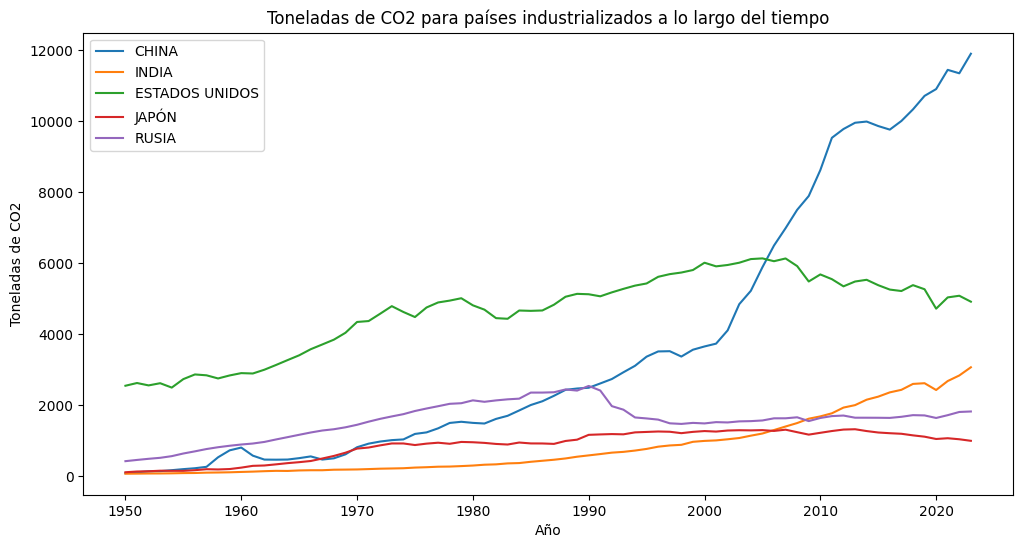

In [ ]:
#PLOT INDUSTRIALIZADO

main2, ax_main2 = plt.subplots(figsize=(12, 6))

ax_main2.plot(df_IND.index, df_CHN['co2'], label='CHINA')
ax_main2.plot(df_IND.index, df_IND['co2'], label='INDIA')
ax_main2.plot(df_IND.index, df_USA['co2'], label='ESTADOS UNIDOS')
ax_main2.plot(df_IND.index, df_JPN['co2'], label='JAPÓN')
ax_main2.plot(df_IND.index, df_RUS['co2'], label='RUSIA')

ax_main2.set_title('Toneladas de CO2 para países industrializados a lo largo del tiempo')
ax_main2.set_xlabel('Año')
ax_main2.set_ylabel('Toneladas de CO2')

plt.legend()

plt.show()

#### Análisis de Toneladas de $CO_2$ a lo largo del tiempo en paises industrializados

El gráfico muestra la evolución de las emisiones de CO₂ en países industrializados a lo largo del tiempo, reflejando un aumento significativo impulsado por el desarrollo económico y la industrialización. Si bien las emisiones crecieron de manera sostenida en la segunda mitad del siglo XX, a partir de los años 2000 se observa una aceleración marcada, especialmente en economías emergentes como China e India.  

Por otro lado, países como Estados Unidos y Rusia muestran una tendencia más estable en las últimas décadas, con ligeras reducciones debido a políticas ambientales, mejoras tecnológicas y cambios en la estructura económica. A pesar de estas diferencias, el gráfico evidencia que los países industrializados han sido históricamente los principales contribuyentes a las emisiones globales de CO₂, con un impacto acumulativo significativo en el cambio climático.


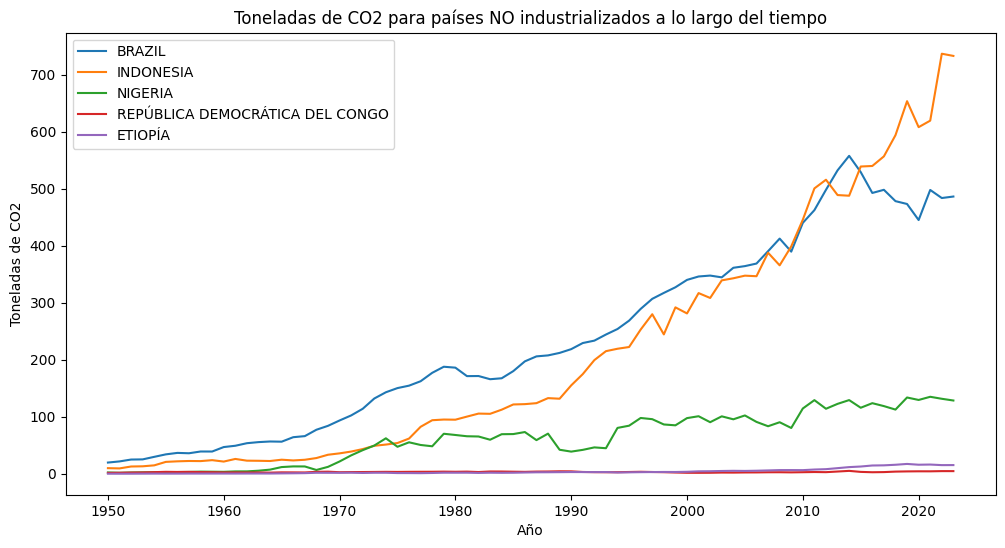

In [ ]:
#PLOT NO INDUSTRIALIZADO

main3, ax_main3 = plt.subplots(figsize=(12, 6))

ax_main3.plot(df_IND.index, df_BRA['co2'], label='BRAZIL')
ax_main3.plot(df_IND.index, df_IDN['co2'], label='INDONESIA')
ax_main3.plot(df_IND.index, df_NGA['co2'], label='NIGERIA')
ax_main3.plot(df_IND.index, df_COD['co2'], label='REPÚBLICA DEMOCRÁTICA DEL CONGO')
ax_main3.plot(df_IND.index, df_ETH['co2'], label='ETIOPÍA')

ax_main3.set_title('Toneladas de CO2 para países NO industrializados a lo largo del tiempo')
ax_main3.set_xlabel('Año')
ax_main3.set_ylabel('Toneladas de CO2')

plt.legend()

plt.show()

#### Análisis de Toneladas de $CO_2$ a lo largo del tiempo en paises no industrializados

El gráfico muestra la evolución de las emisiones de CO₂ en países no industrializados a lo largo del tiempo. A diferencia de los países industrializados, las emisiones aquí son considerablemente más bajas, aunque muestran un aumento progresivo.  

Brasil e Indonesia lideran las emisiones entre estos países, con un crecimiento marcado desde finales del siglo XX debido a la deforestación y al uso de la biomasa como fuente de energía. Indonesia supera a Brasil en los últimos años, con picos superiores a **700 toneladas**.  

Nigeria presenta un aumento gradual desde los años 70, asociado al crecimiento poblacional y la expansión de actividades agrícolas. En cambio, la República Democrática del Congo y Etiopía mantienen niveles muy bajos, con incrementos apenas perceptibles en las últimas décadas.  

In [ ]:
#SACANDO DESARROLLADOS Y NO DESARROLLADOS

df_desarrollado = df[df['iso_code'].str.contains('CHN|IND|USA|JPN|RUS', case=False, na=False)]
df_no_desarrollado = df[df['iso_code'].str.contains('BRA|IDN|NGA|COD|ETH', case=False, na=False)]

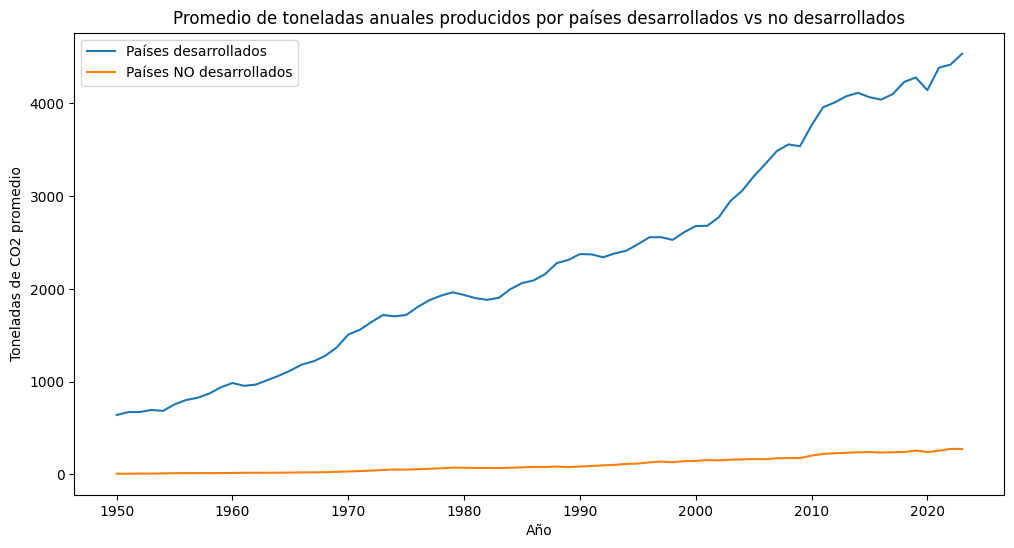

In [ ]:
#SACANDO EL PROMEDIO POR AÑO DESARROLLADO VS NO DESARROLLADO PARA EL CO2

#CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH

df_co2_desarrollado = df_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['co2'])
df_co2_no_desarrollado = df_no_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['co2'])

#PONER BIEN LOS INDICES

df_co2_desarrollado = df_co2_desarrollado.mean()
df_co2_desarrollado = df_co2_desarrollado.reset_index()
df_co2_desarrollado = df_co2_desarrollado.drop(columns = ['level_0'])
df_co2_desarrollado.columns = ['year', 'mean_co2']

df_co2_no_desarrollado = df_co2_no_desarrollado.mean()
df_co2_no_desarrollado = df_co2_no_desarrollado.reset_index()
df_co2_no_desarrollado = df_co2_no_desarrollado.drop(columns = ['level_0'])
df_co2_no_desarrollado.columns = ['year', 'mean_co2']

#PLOT

main4, ax_main4 = plt.subplots(figsize=(12, 6))

ax_main4.plot(df_IND.index, df_co2_desarrollado['mean_co2'], label='Países desarrollados')
ax_main4.plot(df_IND.index, df_co2_no_desarrollado['mean_co2'], label='Países NO desarrollados')

ax_main4.set_title('Promedio de toneladas anuales producidos por países desarrollados vs no desarrollados')
ax_main4.set_xlabel('Año')
ax_main4.set_ylabel('Toneladas de CO2 promedio')

plt.legend()

plt.show()

El gráfico muestra la diferencia en emisiones de CO2 entre países desarrollados y no desarrollados. Los países desarrollados tienen un crecimiento continuo y pronunciado en toneladas de CO2 promedio desde 1950 hasta 2023, mientras que los países no desarrollados mantienen niveles muy bajos con un crecimiento apenas perceptible.


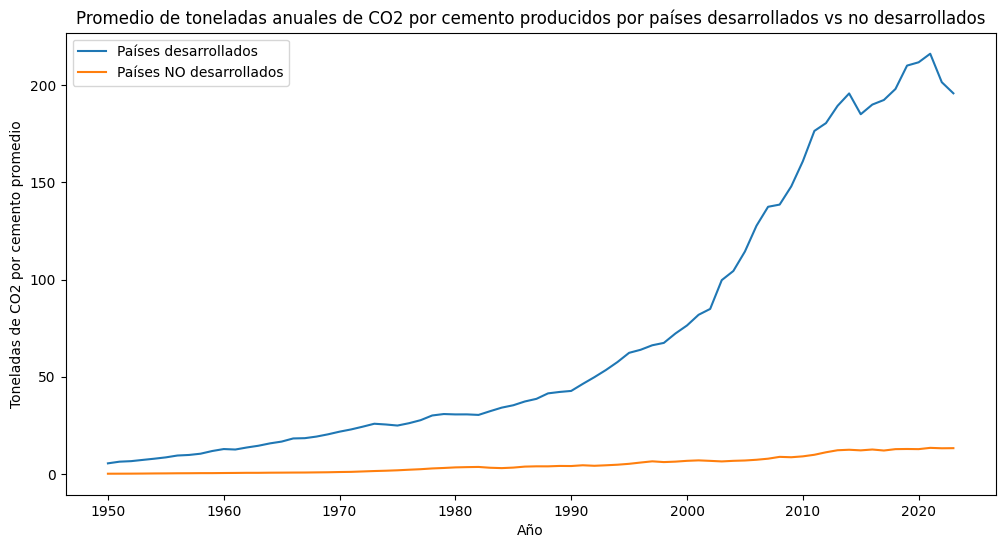

In [ ]:
#SACANDO EL PROMEDIO POR AÑO DESARROLLADO VS NO DESARROLLADO PARA EL CEMENTO

#CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH

df_cemento_desarrollado = df_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['cement_co2'])
df_cemento_no_desarrollado = df_no_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['cement_co2'])

#PONER BIEN LOS INDICES

df_cemento_desarrollado = df_cemento_desarrollado.mean()
df_cemento_desarrollado = df_cemento_desarrollado.reset_index()
df_cemento_desarrollado = df_cemento_desarrollado.drop(columns = ['level_0'])
df_cemento_desarrollado.columns = ['year', 'mean_cement_co2']

df_cemento_no_desarrollado = df_cemento_no_desarrollado.mean()
df_cemento_no_desarrollado = df_cemento_no_desarrollado.reset_index()
df_cemento_no_desarrollado = df_cemento_no_desarrollado.drop(columns = ['level_0'])
df_cemento_no_desarrollado.columns = ['year', 'mean_cement_co2']

#PLOT

main, ax_main = plt.subplots(figsize=(12, 6))

ax_main.plot(df_IND.index, df_cemento_desarrollado['mean_cement_co2'], label='Países desarrollados')
ax_main.plot(df_IND.index, df_cemento_no_desarrollado['mean_cement_co2'], label='Países NO desarrollados')

ax_main.set_title('Promedio de toneladas anuales de CO2 por cemento producidos por países desarrollados vs no desarrollados')
ax_main.set_xlabel('Año')
ax_main.set_ylabel('Toneladas de CO2 por cemento promedio')

plt.legend()

plt.show()

El gráfico muestra que las emisiones de CO2 por la producción de cemento en países desarrollados han crecido de manera constante desde 1950, con un aumento acelerado a partir de 1990 y picos alrededor de 2010 y 2020, reflejando una mayor actividad industrial y construcción. En contraste, los países no desarrollados presentan niveles de emisiones bajos y estables, con un incremento gradual pero mínimo. Esto evidencia una brecha significativa entre ambos grupos, donde los países desarrollados tienen un mayor impacto ambiental en términos de emisiones de CO2 relacionadas con la producción de cemento.

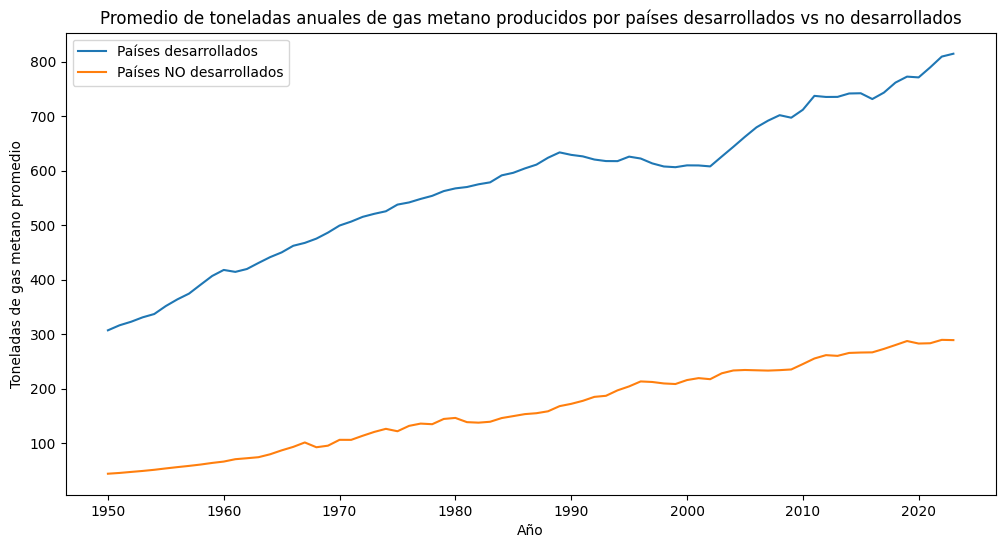

In [ ]:
#SACANDO EL PROMEDIO POR AÑO DESARROLLADO VS NO DESARROLLADO PARA METANO

#CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH

df_methane_desarrollado = df_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['methane'])
df_methane_no_desarrollado = df_no_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['methane'])

#PONER BIEN LOS INDICES

df_methane_desarrollado = df_methane_desarrollado.mean()
df_methane_desarrollado = df_methane_desarrollado.reset_index()
df_methane_desarrollado = df_methane_desarrollado.drop(columns = ['level_0'])
df_methane_desarrollado.columns = ['year', 'mean_methane']
df_methane_no_desarrollado = df_methane_no_desarrollado.mean()
df_methane_no_desarrollado = df_methane_no_desarrollado.reset_index()
df_methane_no_desarrollado = df_methane_no_desarrollado.drop(columns = ['level_0'])
df_methane_no_desarrollado.columns = ['year', 'mean_methane']

#PLOT

main, ax_main = plt.subplots(figsize=(12, 6))

ax_main.plot(df_IND.index, df_methane_desarrollado['mean_methane'], label='Países desarrollados')
ax_main.plot(df_IND.index, df_methane_no_desarrollado['mean_methane'], label='Países NO desarrollados')

ax_main.set_title('Promedio de toneladas anuales de gas metano producidos por países desarrollados vs no desarrollados')
ax_main.set_xlabel('Año')
ax_main.set_ylabel('Toneladas de gas metano promedio')

plt.legend()

plt.show()


El gráfico muestra la evolución del promedio de toneladas anuales de gas metano emitidas por países desarrollados y países no desarrollados en el periodo de 1950 a 2023. A lo largo del tiempo, se observa una tendencia ascendente en ambos casos, aunque con diferencias significativas en la magnitud de las emisiones, siendo los paises desarrollados los que mantienen un ritmo considerablemente más alto. \\
En 1950, las emisiones de gas metano promedio en países desarrollados iniciaron alrededor de 300 toneladas anuales. A lo largo del tiempo, las emisiones aumentaron significativamente, superando las 800 toneladas anuales hacia el año 2023. Es importante detallar también estancamientos temporales entre 1990 y 2000, y luego un repunte importante a partir del año 2005. \\

En 1950, las emisiones de gas metano promedio en paises no desarrollados inician en niveles considerablemente bajos, alrededor de 50 toneladas anuales. A diferencia de los países desarrollados, el crecimiento es más gradual, alcanzando valores cercanos a 300 toneladas anuales en el año 2023. \\

Los niveles de metano presentados en la grafica pueden deberse principalmente al impacto de la industrialización, el transporte y las actividades económicas, los cuales dependen en gran medida de combustibles fósiles en el caso de los paises industrializados y a factores como la deforestación, la agricultura y la falta de tecnologías eficientes para el caso de los paises no desarrollados.

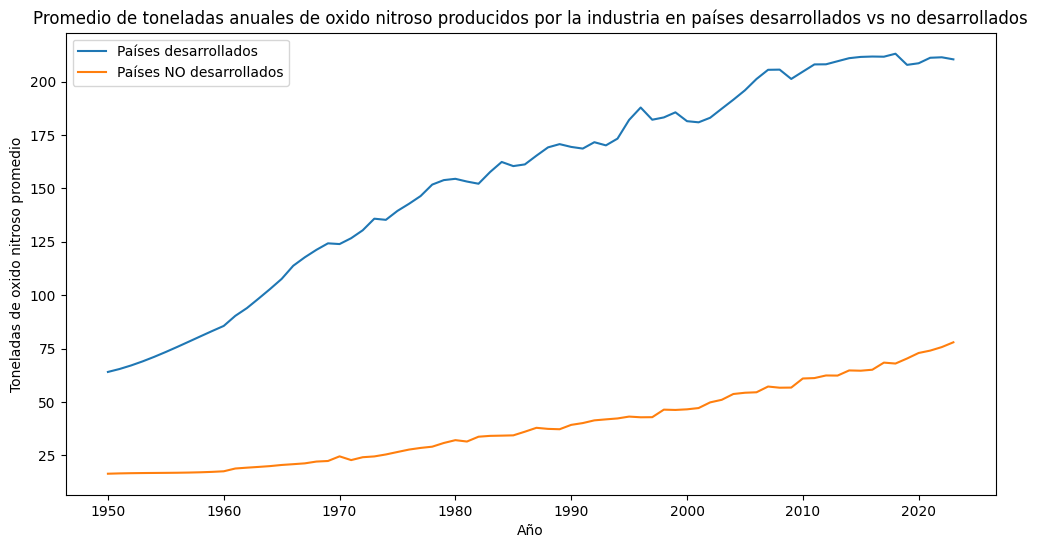

In [ ]:
#SACANDO EL PROMEDIO POR AÑO DESARROLLADO VS NO DESARROLLADO PARA OXIDO NITROSO

#CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH

df_nitrous_oxide_desarrollado = df_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['nitrous_oxide'])
df_nitrous_oxide_no_desarrollado = df_no_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['nitrous_oxide'])

#PONER BIEN LOS INDICES

df_nitrous_oxide_desarrollado = df_nitrous_oxide_desarrollado.mean()
df_nitrous_oxide_desarrollado = df_nitrous_oxide_desarrollado.reset_index()
df_nitrous_oxide_desarrollado = df_nitrous_oxide_desarrollado.drop(columns = ['level_0'])
df_nitrous_oxide_desarrollado.columns = ['year', 'mean_nitrous_oxide']

df_nitrous_oxide_no_desarrollado = df_nitrous_oxide_no_desarrollado.mean()
df_nitrous_oxide_no_desarrollado = df_nitrous_oxide_no_desarrollado.reset_index()
df_nitrous_oxide_no_desarrollado = df_nitrous_oxide_no_desarrollado.drop(columns = ['level_0'])
df_nitrous_oxide_no_desarrollado.columns = ['year', 'mean_nitrous_oxide']

#PLOT

main, ax_main = plt.subplots(figsize=(12, 6))

ax_main.plot(df_IND.index, df_nitrous_oxide_desarrollado['mean_nitrous_oxide'], label='Países desarrollados')
ax_main.plot(df_IND.index, df_nitrous_oxide_no_desarrollado['mean_nitrous_oxide'], label='Países NO desarrollados')

ax_main.set_title('Promedio de toneladas anuales de oxido nitroso producidos por la industria en países desarrollados vs no desarrollados')
ax_main.set_xlabel('Año')
ax_main.set_ylabel('Toneladas de oxido nitroso promedio')

plt.legend()

plt.show()

El gráfico muestra la evolución del promedio de toneladas anuales de óxido nitroso (N₂O) emitidas por la industria en países desarrollados y países no desarrollados entre 1950 y 2023. \\

En 1950, los países desarrollados iniciaron con un promedio cercano a 60 toneladas anuales. A partir de ahí, se observa un incremento constante y acelerado entre las décadas de 1960 y 1990, alcanzando su punto más alto (alrededor de 200 toneladas anuales) entre 2010 y 2023. \\

Las emisiones de óxido nitroso en países no desarrollados son significativamente menores en comparación con los países desarrollados. En 1950, las emisiones rondaban las 20 toneladas anuales. A partir de 1970, las emisiones muestran un aumento constante, llegando a cerca de 80 toneladas anuales en 2023. \\

En el gráfico se puede observar la gran brecha que existe en la emision de óxido nitroso entre los paises desarrollados y no desarrollados, sin embargo en los ultimos años se ha observado la estabilidad en los niveles de emision de este gas de efecto invernadero para el caso de los paises desarrollados, debido posiblemente a la implementación de políticas de mitigación y tecnologías alternativas. Opuestos al caso anterior, los paises no desarrollados presentan un aumento gradual de emisión de óxido nitroso, el cual podría estar relacionado a la industralizacion tardía y la falta de políticas ambientales estrictas. \\

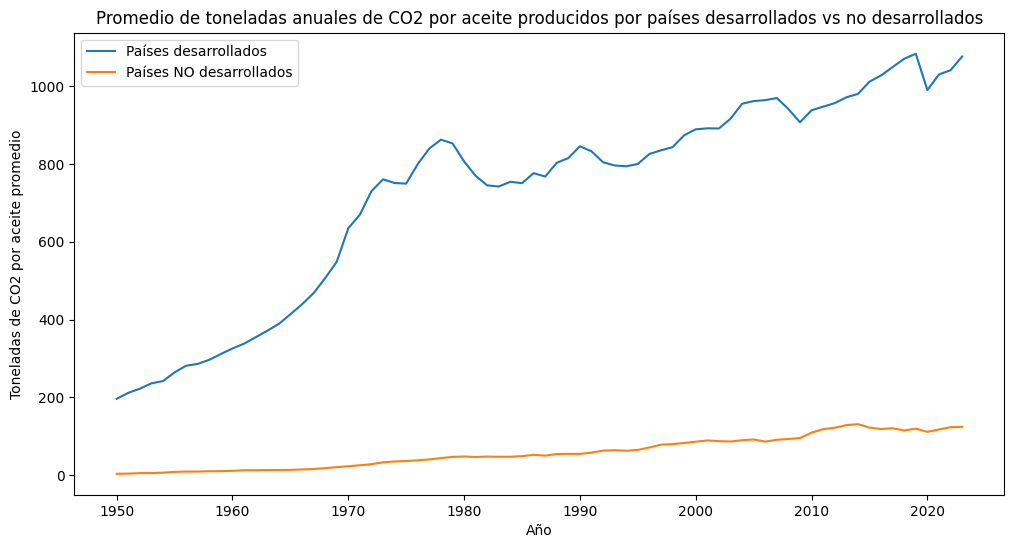

In [ ]:
#SACANDO EL PROMEDIO POR AÑO DESARROLLADO VS NO DESARROLLADO PARA ACEITE

#CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH

df_oil_co2_desarrollado = df_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['oil_co2'])
df_oil_co2_no_desarrollado = df_no_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['oil_co2'])

#PONER BIEN LOS INDICES

df_oil_co2_desarrollado = df_oil_co2_desarrollado.mean()
df_oil_co2_desarrollado = df_oil_co2_desarrollado.reset_index()
df_oil_co2_desarrollado = df_oil_co2_desarrollado.drop(columns = ['level_0'])
df_oil_co2_desarrollado.columns = ['year', 'mean_oil_co2']

df_oil_co2_no_desarrollado = df_oil_co2_no_desarrollado.mean()
df_oil_co2_no_desarrollado = df_oil_co2_no_desarrollado.reset_index()
df_oil_co2_no_desarrollado = df_oil_co2_no_desarrollado.drop(columns = ['level_0'])
df_oil_co2_no_desarrollado.columns = ['year', 'mean_oil_co2']

#PLOT

main, ax_main = plt.subplots(figsize=(12, 6))

ax_main.plot(df_IND.index, df_oil_co2_desarrollado['mean_oil_co2'], label='Países desarrollados')
ax_main.plot(df_IND.index, df_oil_co2_no_desarrollado['mean_oil_co2'], label='Países NO desarrollados')

ax_main.set_title('Promedio de toneladas anuales de CO2 por aceite producidos por países desarrollados vs no desarrollados')
ax_main.set_xlabel('Año')
ax_main.set_ylabel('Toneladas de CO2 por aceite promedio')

plt.legend()

plt.show()

El gráfico muestra las emisiones de CO2 promedio por la producción de aceite entre países desarrollados y no desarrollados desde 1950. Las emisiones en países desarrollados han tenido un crecimiento significativo hasta alcanzar un pico cercano a las **1050 toneladas** en la última década, con fluctuaciones a partir de los años 1980. Por otro lado, los países no desarrollados muestran un aumento mucho más gradual y constante, alcanzando valores apenas superiores a las **100 toneladas**. Esta diferencia destaca una mayor producción y consumo de aceite en países desarrollados, resultando en un impacto ambiental considerablemente superior.

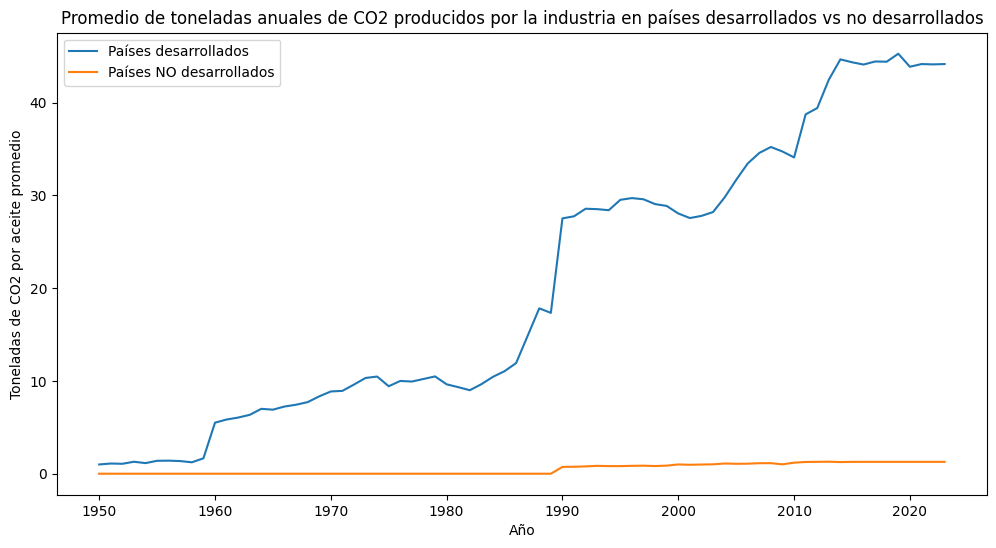

In [ ]:
#SACANDO EL PROMEDIO POR AÑO DESARROLLADO VS NO DESARROLLADO PARA OTROS

#CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH

df_other_industry_co2_desarrollado = df_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['other_industry_co2'])
df_other_industry_co2_no_desarrollado = df_no_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['other_industry_co2'])

#PONER BIEN LOS INDICES

df_other_industry_co2_desarrollado = df_other_industry_co2_desarrollado.mean()
df_other_industry_co2_desarrollado = df_other_industry_co2_desarrollado.reset_index()
df_other_industry_co2_desarrollado = df_other_industry_co2_desarrollado.drop(columns = ['level_0'])
df_other_industry_co2_desarrollado.columns = ['year', 'mean_other_industry_co2']

df_other_industry_co2_no_desarrollado = df_other_industry_co2_no_desarrollado.mean()
df_other_industry_co2_no_desarrollado = df_other_industry_co2_no_desarrollado.reset_index()
df_other_industry_co2_no_desarrollado = df_other_industry_co2_no_desarrollado.drop(columns = ['level_0'])
df_other_industry_co2_no_desarrollado.columns = ['year', 'mean_other_industry_co2']

#PLOT

main, ax_main = plt.subplots(figsize=(12, 6))

ax_main.plot(df_IND.index, df_other_industry_co2_desarrollado['mean_other_industry_co2'], label='Países desarrollados')
ax_main.plot(df_IND.index, df_other_industry_co2_no_desarrollado['mean_other_industry_co2'], label='Países NO desarrollados')

ax_main.set_title('Promedio de toneladas anuales de CO2 producidos por la industria en países desarrollados vs no desarrollados')
ax_main.set_xlabel('Año')
ax_main.set_ylabel('Toneladas de CO2 por aceite promedio')

plt.legend()

plt.show()

El gráfico muestra una gran disparidad en las emisiones de CO₂ producidas por la industria en países desarrollados y no desarrollados entre los años 1950 y 2023. En los países desarrollados, se observa un crecimiento constante de las emisiones desde 1960, con un incremento pronunciado entre las décadas de 1980 y 2000, alcanzando un pico de aproximadamente 45 toneladas de CO₂ por unidad promedio a partir de 2010, donde luego se estabilizan. En contraste, las emisiones en los países no desarrollados permanecen prácticamente sin cambios a lo largo del tiempo, manteniéndose en niveles muy bajos comparados con los países desarrollados. Esto pone de manifiesto una marcada diferencia en la contribución industrial a las emisiones de CO₂ entre ambos grupos de países.

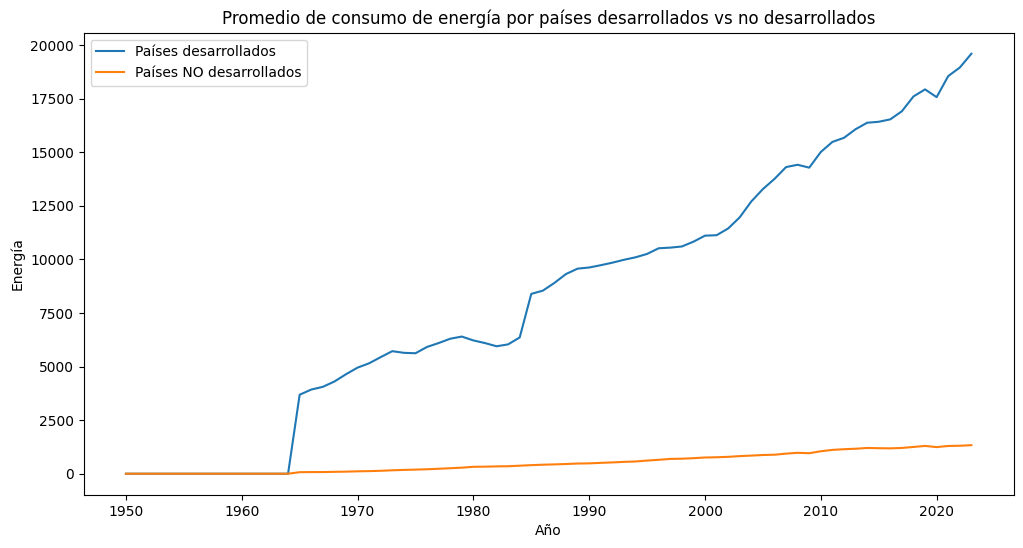

In [ ]:
#SACANDO EL PROMEDIO POR AÑO DESARROLLADO VS NO DESARROLLADO PARA EL GASTO DE ENERGIA

#CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH

df_energy_desarrollado = df_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['primary_energy_consumption'])
df_energy_no_desarrollado = df_no_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['primary_energy_consumption'])

#PONER BIEN LOS INDICES

df_energy_desarrollado = df_energy_desarrollado.mean()
df_energy_desarrollado = df_energy_desarrollado.reset_index()
df_energy_desarrollado = df_energy_desarrollado.drop(columns = ['level_0'])
df_energy_desarrollado.columns = ['year', 'mean_energy_co2']

df_energy_no_desarrollado = df_energy_no_desarrollado.mean()
df_energy_no_desarrollado = df_energy_no_desarrollado.reset_index()
df_energy_no_desarrollado = df_energy_no_desarrollado.drop(columns = ['level_0'])
df_energy_no_desarrollado.columns = ['year', 'mean_energy_co2']

#PLOT

main, ax_main = plt.subplots(figsize=(12, 6))

ax_main.plot(df_IND.index, df_energy_desarrollado['mean_energy_co2'], label='Países desarrollados')
ax_main.plot(df_IND.index, df_energy_no_desarrollado['mean_energy_co2'], label='Países NO desarrollados')

ax_main.set_title('Promedio de consumo de energía por países desarrollados vs no desarrollados')
ax_main.set_xlabel('Año')
ax_main.set_ylabel('Energía')

plt.legend()

plt.show()

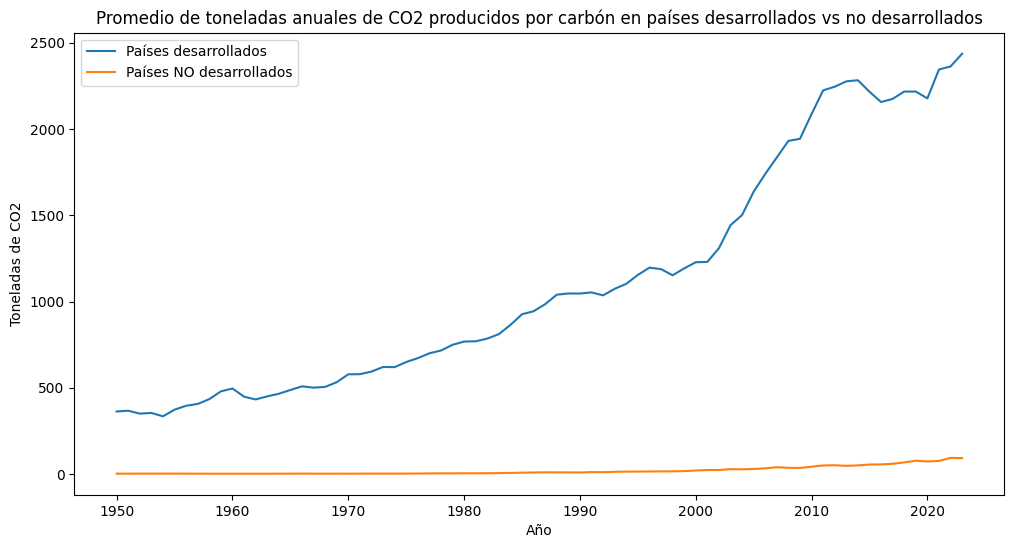

In [ ]:
#SACANDO EL PROMEDIO POR AÑO DESARROLLADO VS NO DESARROLLADO PARA CARBÓN

#CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH

df_coal_co2_desarrollado = df_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['coal_co2'])
df_coal_co2_no_desarrollado = df_no_desarrollado.pivot(index='iso_code', columns = ['year'], values = ['coal_co2'])

#PONER BIEN LOS INDICES

df_coal_co2_desarrollado = df_coal_co2_desarrollado.mean()
df_coal_co2_desarrollado = df_coal_co2_desarrollado.reset_index()
df_coal_co2_desarrollado = df_coal_co2_desarrollado.drop(columns = ['level_0'])
df_coal_co2_desarrollado.columns = ['year', 'coal_co2']

df_coal_co2_no_desarrollado = df_coal_co2_no_desarrollado.mean()
df_coal_co2_no_desarrollado = df_coal_co2_no_desarrollado.reset_index()
df_coal_co2_no_desarrollado = df_coal_co2_no_desarrollado.drop(columns = ['level_0'])
df_coal_co2_no_desarrollado.columns = ['year', 'coal_co2']

#PLOT

main, ax_main = plt.subplots(figsize=(12, 6))

ax_main.plot(df_IND.index, df_coal_co2_desarrollado['coal_co2'], label='Países desarrollados')
ax_main.plot(df_IND.index, df_coal_co2_no_desarrollado['coal_co2'], label='Países NO desarrollados')

ax_main.set_title('Promedio de toneladas anuales de CO2 producidos por carbón en países desarrollados vs no desarrollados')
ax_main.set_xlabel('Año')
ax_main.set_ylabel('Toneladas de CO2')

plt.legend()

plt.show()

In [ ]:
import seaborn as sns
import seaborn.objects as so
import plotly.graph_objects as go

#### MAPA DE CALOR PARA LA PRODUCCIÓN DE CO2 (MEDIDA EN MILES DE TONELADAS) EN LOS PAÍSES DESARROLLADOS PARA LOS ÚLTIMOS 10 AÑOS

El gráfico muestra una clara disminución del CO2 producido en Estados Unidos desde la pandemia, Japón lleva una década disminuyendo año con año sus emisiones, pero Rusia, India y China siguen en aumento.

<Axes: xlabel='year', ylabel='iso_code'>

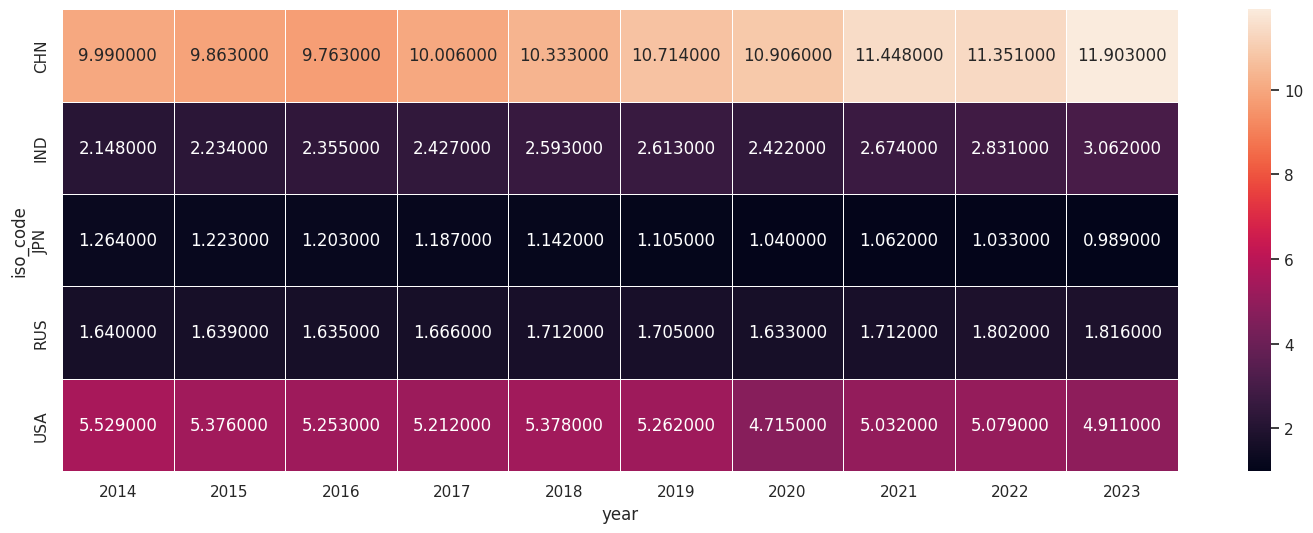

In [ ]:
sns.set_theme()

df_heatmap_desarrollado = df[(df['year'] >= 2014) & (df['year'] <= 2023)]
df_heatmap_desarrollado = df_heatmap_desarrollado[df_heatmap_desarrollado['iso_code'].str.contains('CHN|IND|USA|JPN|RUS', case=False, na=False)]
df_heatmap_desarrollado['co2'] = (df_heatmap_desarrollado['co2'] / 1000)
df_heatmap_desarrollado['co2'] = df_heatmap_desarrollado['co2'].round(3).astype(float)

#CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH

heatmap = (
    df_heatmap_desarrollado
    .pivot(index="iso_code", columns="year", values="co2")
)


f, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(heatmap, annot=True, fmt="f", linewidths=.5, ax=ax)

#### Comparación entre los dos países no industrializados más contaminantes
Se nota en la gráfica que en los útlimos 10 años, Brazil ha disminuido su total anual de emisiones, mientras que las de Indonesia han aumentado a casi el doble.

<Axes: xlabel='year', ylabel='iso_code'>

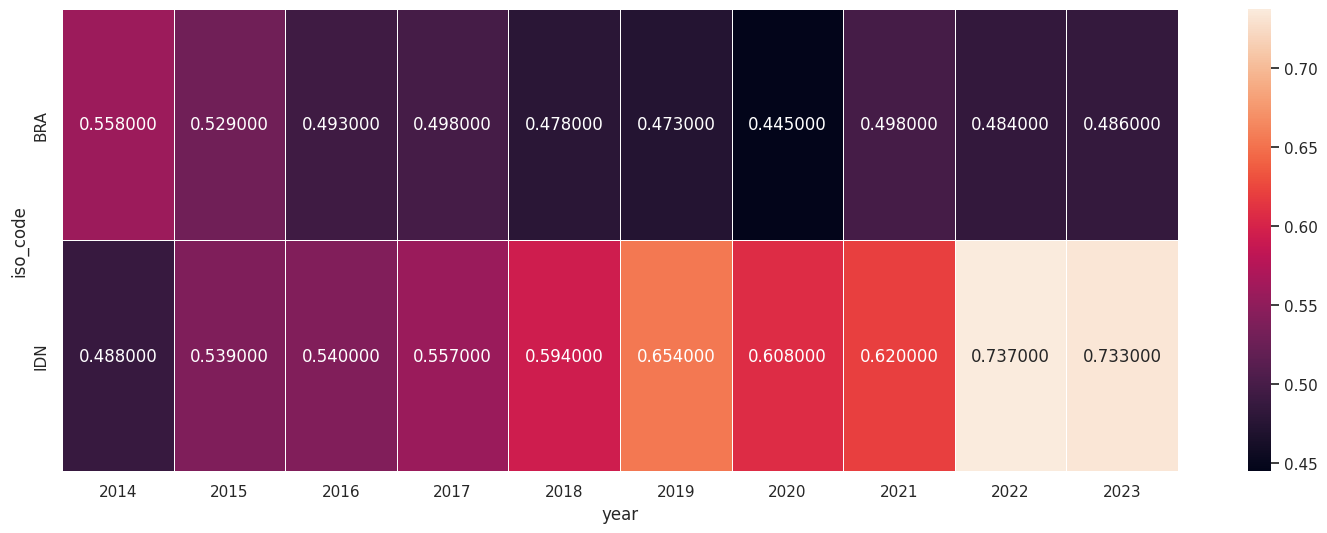

In [ ]:
sns.set_theme()

df_heatmap_no_desarrollado = df[(df['year'] >= 2014) & (df['year'] <= 2023)]
df_heatmap_no_desarrollado = df_heatmap_no_desarrollado[df_heatmap_no_desarrollado['iso_code'].str.contains('BRA|IDN', case=False, na=False)]
df_heatmap_no_desarrollado['co2'] = (df_heatmap_no_desarrollado['co2'] / 1000)
df_heatmap_no_desarrollado['co2'] = df_heatmap_no_desarrollado['co2'].round(3).astype(float)

#CHN|IND|USA|JPN|RUS|BRA|IDN|NGA|COD|ETH

heatmap_prime = (
    df_heatmap_no_desarrollado
    .pivot(index="iso_code", columns="year", values="co2")
)


f, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(heatmap_prime, annot=True, fmt="f", linewidths=.5, ax=ax)

In [ ]:
!pip install matplotlib ipywidgets pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.4 MB/s eta 0:00:00


In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

df_cola = df[df['iso_code'].str.contains('CHN|IND|USA|JPN|RUS', case=False, na=False)]
#BRA|IDN|NGA|COD|ETH

def crear_grafico_pastel(year):

    df_filtrado = df_cola[df_cola['year'] == year]


    plt.figure(figsize=(16,12))
    plt.pie(df_filtrado['co2'], labels=df_filtrado['country'], autopct='%1.1f%%', startangle=90)
    plt.title(f'CO2 producido por países industrializados en {year}')
    plt.axis('equal')
    plt.show()

# Crear el slider
interact(crear_grafico_pastel, year=widgets.IntSlider(min=df_cola['year'].min(), max=df_cola['year'].max(), step=1, value=df_cola['year'].min()))

interactive(children=(IntSlider(value=1950, description='year', max=2023, min=1950), Output()), _dom_classes=(…

<function __main__.crear_grafico_pastel(year)>

In [ ]:
df_interact_no_desarrollado = df[df['iso_code'].str.contains('BRA|IDN|NGA|COD|ETH', case=False, na=False)]
#BRA|IDN|NGA|COD|ETH

def crear_grafico_pastel(year):

    df_filtrado = df_interact_no_desarrollado[df_interact_no_desarrollado['year'] == year]


    plt.figure(figsize=(16, 12))
    plt.pie(df_filtrado['co2'], labels=df_filtrado['country'], autopct='%1.1f%%', startangle=90)
    plt.title(f'CO2 producido por países NO industrializados en {year}')
    plt.axis('equal')
    plt.show()

# Crear el slider
interact(crear_grafico_pastel, year=widgets.IntSlider(min=df_interact_no_desarrollado['year'].min(), max=df_interact_no_desarrollado['year'].max(), step=1, value=df_interact_no_desarrollado['year'].min()))

interactive(children=(IntSlider(value=1950, description='year', max=2023, min=1950), Output()), _dom_classes=(…

<function __main__.crear_grafico_pastel(year)>

#### OTROS ANÁLISIS

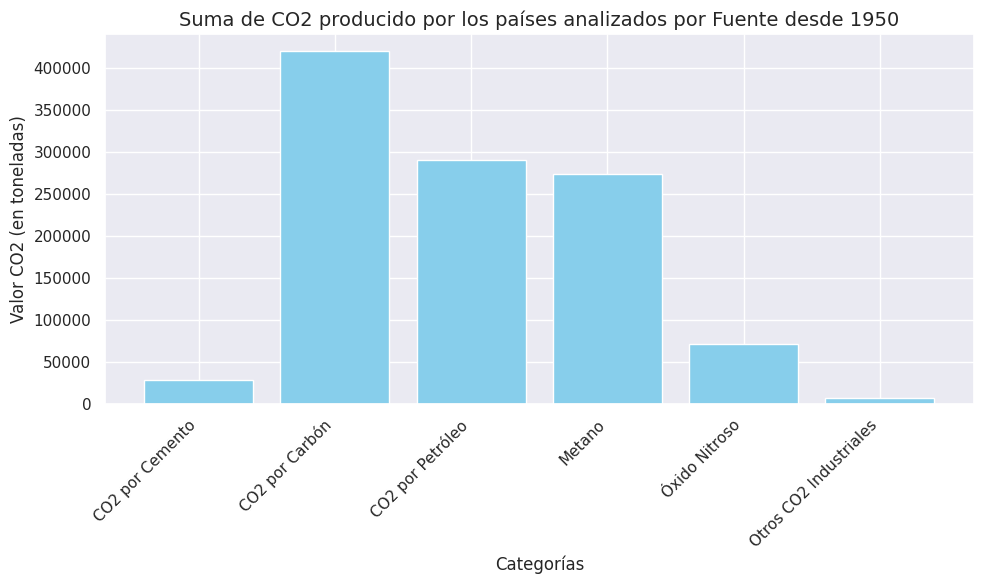

891886.278

In [ ]:
suma_co2 = df['co2'].sum()
suma_cement_co2 = df['cement_co2'].sum()
suma_coal_co2 = df['coal_co2'].sum()
suma_oil_co2 = df['oil_co2'].sum()
suma_methane = df['methane'].sum()
suma_nitrous_oxide = df['nitrous_oxide'].sum()
suma_other_industry_co2 = df['other_industry_co2'].sum()

valores = [suma_cement_co2, suma_coal_co2, suma_oil_co2, suma_methane, suma_nitrous_oxide, suma_other_industry_co2]
etiquetas = ['CO2 por Cemento', 'CO2 por Carbón', 'CO2 por Petróleo', 'Metano', 'Óxido Nitroso', 'Otros CO2 Industriales']

plt.figure(figsize=(10, 6))
plt.bar(etiquetas, valores, color='skyblue')

plt.title('Suma de CO2 producido por los países analizados por Fuente desde 1950', fontsize=14)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Valor CO2 (en toneladas)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

suma_co2

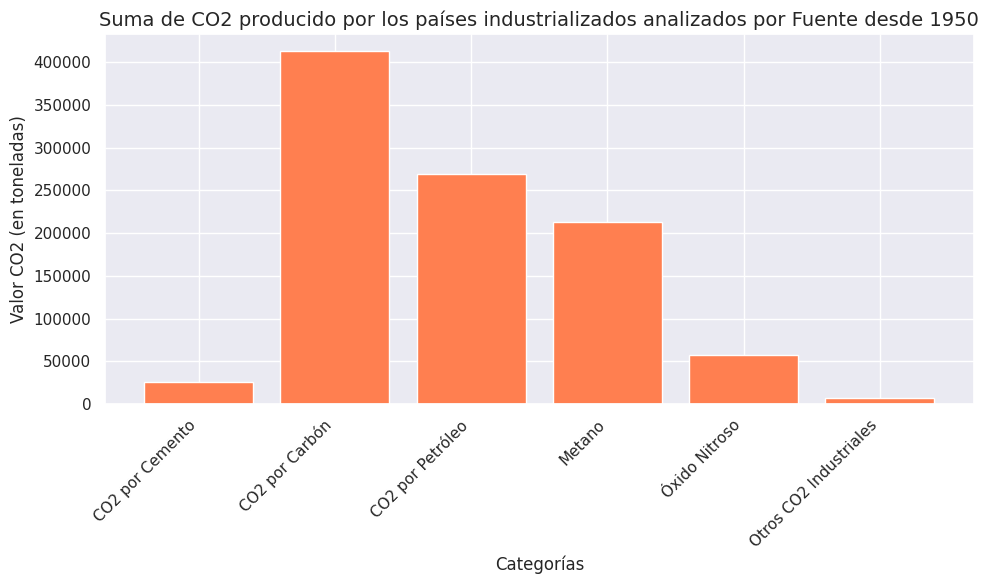

853431.762

In [ ]:
df_industrializados_sumas = df[df['iso_code'].str.contains('CHN|IND|USA|JPN|RUS', case=False, na=False)]

suma_co2_industrial = df_industrializados_sumas['co2'].sum()
suma_cement_co2_industrial = df_industrializados_sumas['cement_co2'].sum()
suma_coal_co2_industrial = df_industrializados_sumas['coal_co2'].sum()
suma_oil_co2_industrial = df_industrializados_sumas['oil_co2'].sum()
suma_methane_industrial = df_industrializados_sumas['methane'].sum()
suma_nitrous_oxide_industrial = df_industrializados_sumas['nitrous_oxide'].sum()
suma_other_industry_co2_industrial = df_industrializados_sumas['other_industry_co2'].sum()

valores_industrial = [suma_cement_co2_industrial, suma_coal_co2_industrial, suma_oil_co2_industrial,
                      suma_methane_industrial, suma_nitrous_oxide_industrial, suma_other_industry_co2_industrial]
etiquetas_industrial = ['CO2 por Cemento', 'CO2 por Carbón', 'CO2 por Petróleo', 'Metano', 'Óxido Nitroso', 'Otros CO2 Industriales']

plt.figure(figsize=(10, 6))
plt.bar(etiquetas_industrial, valores_industrial, color='coral')

plt.title('Suma de CO2 producido por los países industrializados analizados por Fuente desde 1950', fontsize=14)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Valor CO2 (en toneladas)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

suma_co2_industrial

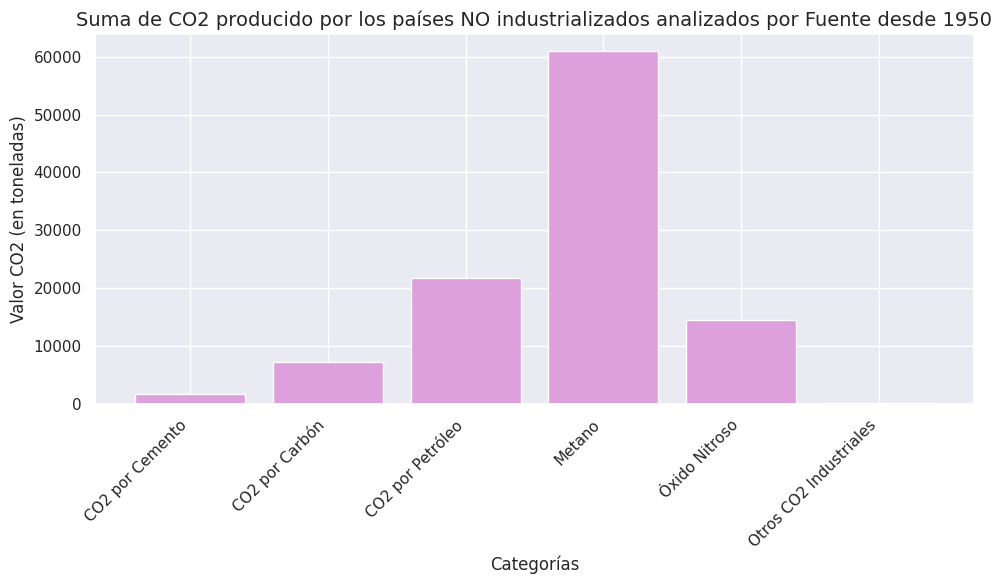

38454.516

In [ ]:
df_no_industrializados_sumas = df[df['iso_code'].str.contains('BRA|IDN|NGA|COD|ETH', case=False, na=False)]

suma_co2_no_industrial = df_no_industrializados_sumas['co2'].sum()
suma_cement_co2_no_industrial = df_no_industrializados_sumas['cement_co2'].sum()
suma_coal_co2_no_industrial = df_no_industrializados_sumas['coal_co2'].sum()
suma_oil_co2_no_industrial = df_no_industrializados_sumas['oil_co2'].sum()
suma_methane_no_industrial = df_no_industrializados_sumas['methane'].sum()
suma_nitrous_oxide_no_industrial = df_no_industrializados_sumas['nitrous_oxide'].sum()
suma_other_industry_co2_no_industrial = df_no_industrializados_sumas['other_industry_co2'].sum()

valores_no_industrial = [suma_cement_co2_no_industrial, suma_coal_co2_no_industrial, suma_oil_co2_no_industrial,
                      suma_methane_no_industrial, suma_nitrous_oxide_no_industrial, suma_other_industry_co2_no_industrial]
etiquetas_no_industrial = ['CO2 por Cemento', 'CO2 por Carbón', 'CO2 por Petróleo', 'Metano', 'Óxido Nitroso', 'Otros CO2 Industriales']

plt.figure(figsize=(10, 6))
plt.bar(etiquetas_no_industrial, valores_no_industrial, color='plum')

plt.title('Suma de CO2 producido por los países NO industrializados analizados por Fuente desde 1950', fontsize=14)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Valor CO2 (en toneladas)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

suma_co2_no_industrial

# TENDENCIAS Y PREDICCIONES



### Tendencias de producción de CO2 para Estados Unidos

Aunque irregular, la tendencia para la producción de CO2 para Estados Unidos es hacia bajo, es decir, en promedio, cada año reducen la cantidad producida

<ipython-input-116-fac3fb9016b3>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_USA = df_USA[(df_USA['year'] >= 2013) & (df['year'] <= 2023)]


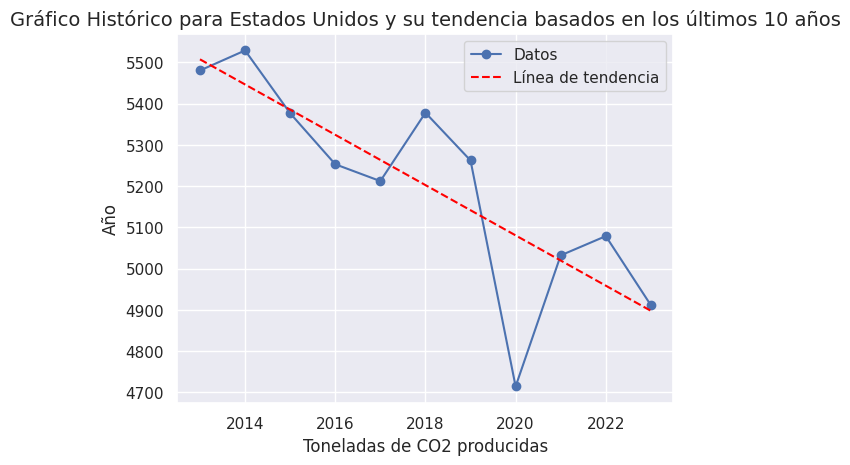

In [ ]:
import pandas as pd
import numpy as np

df_USA = df_USA[(df_USA['year'] >= 2013) & (df['year'] <= 2023)]


df_tendency_USA = (df_USA['co2'])
df_tendency_USA = df_tendency_USA.tolist()

x_USA = df_USA['year'].tolist()

y_USA = df_tendency_USA


plt.plot(x_USA, y_USA, marker='o', label='Datos')

# Calcular la línea de tendencia (regresión lineal)
# np.polyfit(x, y, 1) -> el 1 es el grado del polinomio (en este caso, una recta)
coef = np.polyfit(x_USA, y_USA, 1)
linea_tendencia = np.polyval(coef, x_USA)  # Evaluar la línea de tendencia



plt.plot(x_USA, linea_tendencia, color='red', linestyle='--', label='Línea de tendencia')

# Añadir etiquetas y título
plt.title('Producción de CO2 de Estados Unidos y su tendencia basados en los últimos 10 años', fontsize=14)
plt.xlabel('Toneladas de CO2 producidas', fontsize=12)
plt.ylabel('Año', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()




### Tendencias de producción de CO2 para China

Históricamente, y basados en los últimos 10 años, laa tendencia para la producción de CO2 de China es hacia el alza, lo cual es muy preocupante.

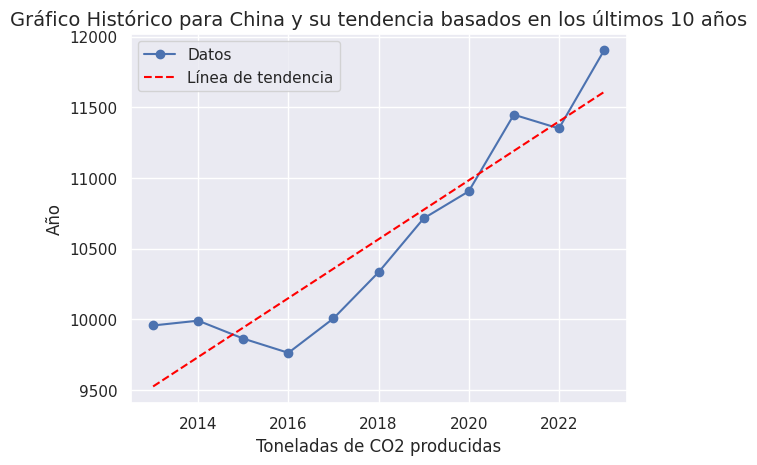

In [ ]:
import pandas as pd
import numpy as np

df_CHN = df_CHN[(df_CHN['year'] >= 2013) & (df_CHN['year'] <= 2023)]


df_tendency_CHN = (df_CHN['co2'])
df_tendency_CHN = df_tendency_CHN.tolist()

x_CHN = df_CHN['year'].tolist()

y_CHN = df_tendency_CHN


plt.plot(x_CHN, y_CHN, marker='o', label='Datos')

# Calcular la línea de tendencia (regresión lineal)
# np.polyfit(x, y, 1) -> el 1 es el grado del polinomio (en este caso, una recta)
coef = np.polyfit(x_CHN, y_CHN, 1)
linea_tendencia = np.polyval(coef, x_CHN)  # Evaluar la línea de tendencia



plt.plot(x_CHN, linea_tendencia, color='red', linestyle='--', label='Línea de tendencia')

# Añadir etiquetas y título
plt.title('Producción de CO2 de China y su tendencia basados en los últimos 10 años', fontsize=14)
plt.xlabel('Toneladas de CO2 producidas', fontsize=12)
plt.ylabel('Año', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


### Tendencias de producción de CO2 para la India

Igualmente, el CO2 producido por la India crece conforme pasan los años, lo cual indica una fuerte relación entre la cantidad de pobladores y el aporte a la huella de carbono.

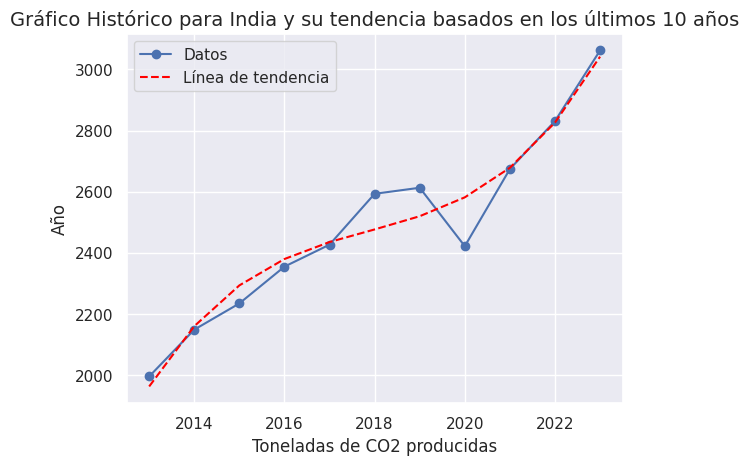

In [ ]:
import pandas as pd
import numpy as np

df_IND = df_IND[(df_IND.index >= 2013) & (df_IND.index <= 2023)]


df_tendency_IND = (df_IND['co2'])
df_tendency_IND = df_tendency_IND.tolist()

x_IND = df_IND.index.tolist()

y_IND = df_tendency_IND


plt.plot(x_IND, y_IND, marker='o', label='Datos')

# Calcular la línea de tendencia (regresión lineal)
# np.polyfit(x, y, 1) -> el 1 es el grado del polinomio (en este caso, una recta)
coef = np.polyfit(x_IND, y_IND, 3)
linea_tendencia = np.polyval(coef, x_IND)  # Evaluar la línea de tendencia



plt.plot(x_IND, linea_tendencia, color='red', linestyle='--', label='Línea de tendencia')

# Añadir etiquetas y título
plt.title('Gráfico Histórico para India y su tendencia basados en los últimos 10 años', fontsize=14)
plt.xlabel('Toneladas de CO2 producidas', fontsize=12)
plt.ylabel('Año', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


### Tendencias de producción de CO2 para Brazil
Brazil bajaba su producción de CO2 cada año, pero desde el 2020 se ha visto un incremente significativo.

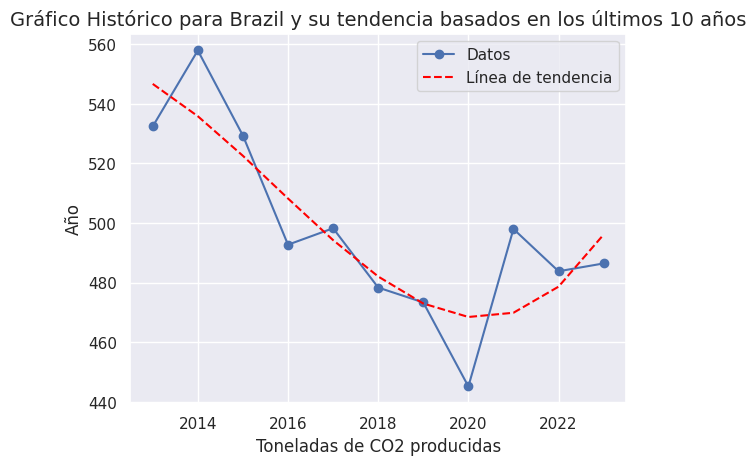

In [ ]:
import pandas as pd
import numpy as np

df_BRA = df_BRA[(df_BRA['year'] >= 2013) & (df_BRA['year'] <= 2023)]


df_tendency_BRA = (df_BRA['co2'])
df_tendency_BRA = df_tendency_BRA.tolist()

x_BRA = df_BRA['year'].tolist()

y_BRA = df_tendency_BRA


plt.plot(x_BRA, y_BRA, marker='o', label='Datos')

# Calcular la línea de tendencia (regresión lineal)
# np.polyfit(x, y, 1) -> el 1 es el grado del polinomio (en este caso, una recta)
coef = np.polyfit(x_BRA, y_BRA, 3)
linea_tendencia = np.polyval(coef, x_BRA)  # Evaluar la línea de tendencia



plt.plot(x_BRA, linea_tendencia, color='red', linestyle='--', label='Línea de tendencia')

# Añadir etiquetas y título
plt.title('Gráfico Histórico para Brazil y su tendencia basados en los últimos 10 años', fontsize=14)
plt.xlabel('Toneladas de CO2 producidas', fontsize=12)
plt.ylabel('Año', fontsize=12)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()
